# Analysis of Competitiveness
### la-results-clean.csv

Here, I'm going to take a look at some election results for the state of Louisiana to understand just how competitive these elections are.

In [0]:
%matplotlib inline

### Imports

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

### Loading the Data

In [0]:
RESULTS_PATH = 'Louisiana/data/la-results-clean.csv'

In [7]:
results = pd.read_csv(RESULTS_PATH, index_col=0)
results.head()

FileNotFoundError: ignored

### Early Analysis

First, I plot the number of races grouped by the number of candidates running in them. I divide up the bar by the number of elections one per party.

In [0]:
# unique n_can entries in our table
n_can_counts = results['n_can'].value_counts()
#party_by_n_can = results.groupby(['n_can', 'party']).count()['position']
#print(n_can_counts)

dem_n_can = results['n_can'][results['party']=='DEM'][results['n_can'] < 16].value_counts()
rep_n_can = results['n_can'][results['party']=='REP'][results['n_can'] < 16].value_counts()
nopty_n_can = results['n_can'][results['party']=='NOPTY'][results['n_can'] < 16].value_counts()
other_n_can = results['n_can'][results['party']=='OTHER'][results['n_can'] < 16].value_counts()

/Users/prratekramchandani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


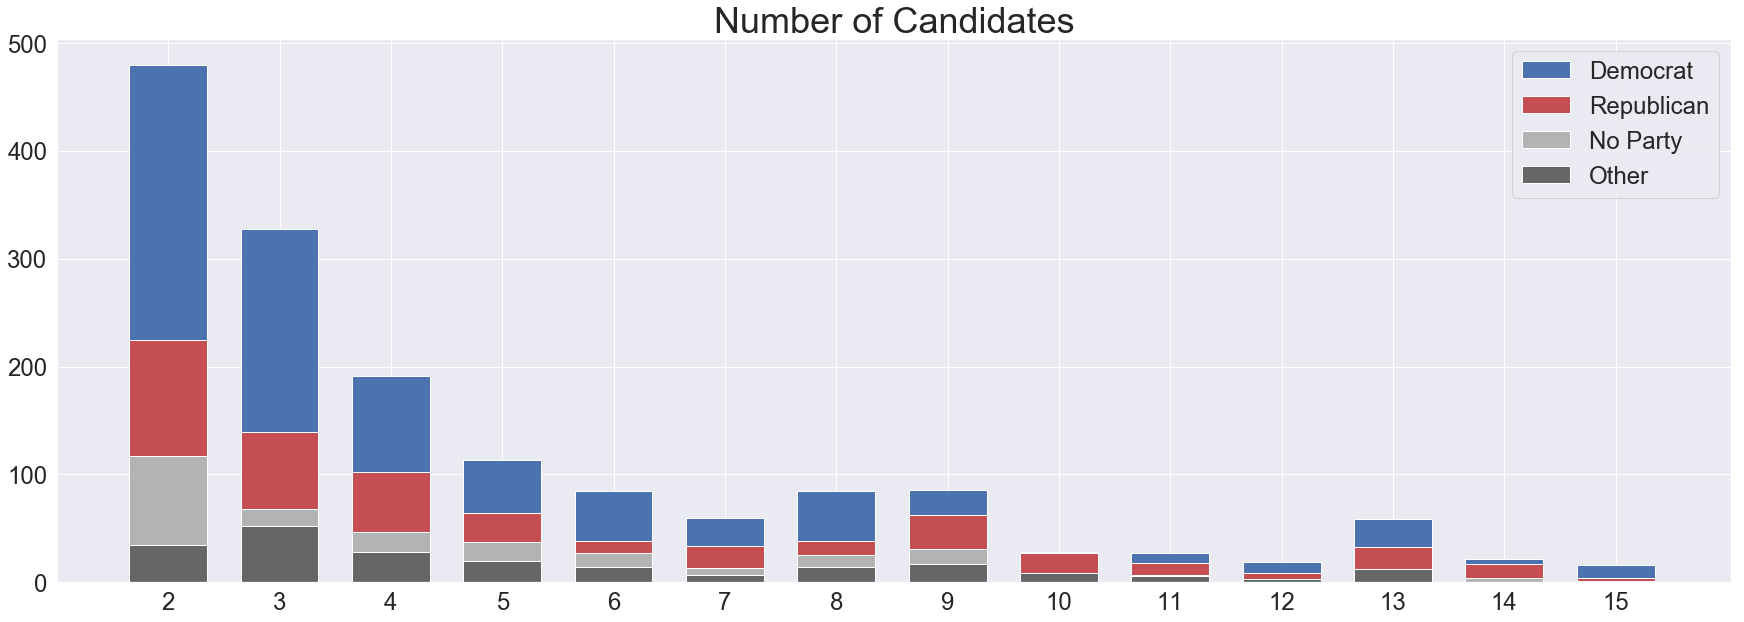

In [0]:
# let's plot our data for less than 16 candidats running. any more and get gets sparse.
# we can examine those data points by themselves later on.
x = results[results['n_can'] < 16].n_can.unique()

# n_can axis for winning party=OTHER. there isn't an OTHER winner for each 'x' above.
x_other = results[results['party']=='OTHER'][results['n_can'] < 16].n_can.unique()

width = 0.7   # bar width

plt.figure(figsize = (30, 10))   # initialize the matplotlib figure

# the four sections of each stacked bar; we don't have more granular data on winning
# party outside of DEM and REP.
dem = plt.bar(x, dem_n_can, width, color='b')
rep = plt.bar(x, rep_n_can, width, color='r')
nopty = plt.bar(x, nopty_n_can, width, color='0.7')
other = plt.bar(x_other, other_n_can, width, color='0.4')

#plt.xlabel('Number of Candidates')
#plt.ylabel('Number of Races')
plt.title('Number of Candidates', fontsize=36)

# just some formatting to make it lok nice
plt.xlim(xmin=1)
plt.xticks(x, fontsize=24)
plt.yticks(fontsize=24)

# include a legend
plt.legend((dem[0], rep[0], nopty[0], other[0]), ('Democrat', 'Republican', 'No Party', 'Other'),
                          prop={'size':24})

An overwhelming majority of races had less than 5 candidates running. We see how quickly the number of races drops off as number of candidates rising. I'm unsure why there doesn't seem to be any data on uncontested election, i.e., with just one condidate running. This could be either because there were no such races or because we're simply missing that data here.

Let's look at **what positions had more than 15 candidates run**.

In [0]:
results[results['n_can'] > 15].groupby('position').count()['candidate']

position
Member of School Board    356
U. S. Senator              24
Name: candidate, dtype: int64

What about **more than 24**?

In [0]:
results[results['n_can'] > 24].groupby('position').count()['candidate']

position
Member of School Board    192
Name: candidate, dtype: int64

For each position, what was the **maximum number of people who ran**?

In [0]:
positions = results.position.unique()

max_can_by_pos = [results[results['position']==pos].n_can.unique().max() for pos in positions]
max_can = pd.DataFrame({'position': positions, 'max_candidates': max_can_by_pos})

max_can_sorted = max_can.sort_values('max_candidates', ascending=False)
print(max_can_sorted)

                      position  max_candidates
33      Member of School Board              37
41               U. S. Senator              24
17             Council Members              15
2                     Aldermen              14
10                   Constable              13
37       Presidential Electors              13
31             Mayor-President              12
15           Council Member(s)              12
40        U. S. Representative              12
20                  Councilmen              11
27        Justice of the Peace               9
34   Member(s) of School Board               8
9                 City Marshal               7
30                       Mayor               7
16  Council Member(s) at Large               7
6              Chief of Police               6
24                       Judge               6
18                  Councilman               6
35            Parish President               5
1            Alderman at Large               5
23           

In [0]:
demvotes_n_can = results[results['party']=='DEM'].groupby('n_can').sum()['votes'].tolist()
repvotes_n_can = results[results['party']=='REP'].groupby('n_can').sum()['votes'].tolist()
noptyvotes_n_can = results[results['party']=='NOPTY'].groupby('n_can').sum()['votes'].tolist()
othervotes_n_can = results[results['party']=='OTHER'].groupby('n_can').sum()['votes'].tolist()

print(demvotes_n_can)

[1585413, 1229064, 439835, 202672, 249689, 141804, 751397, 101572, 24379, 15011, 239779, 789524, 17775, 11684, 36552, 9788, 15370, 17626, 9511, 695288, 20325, 24209, 28407, 18840]


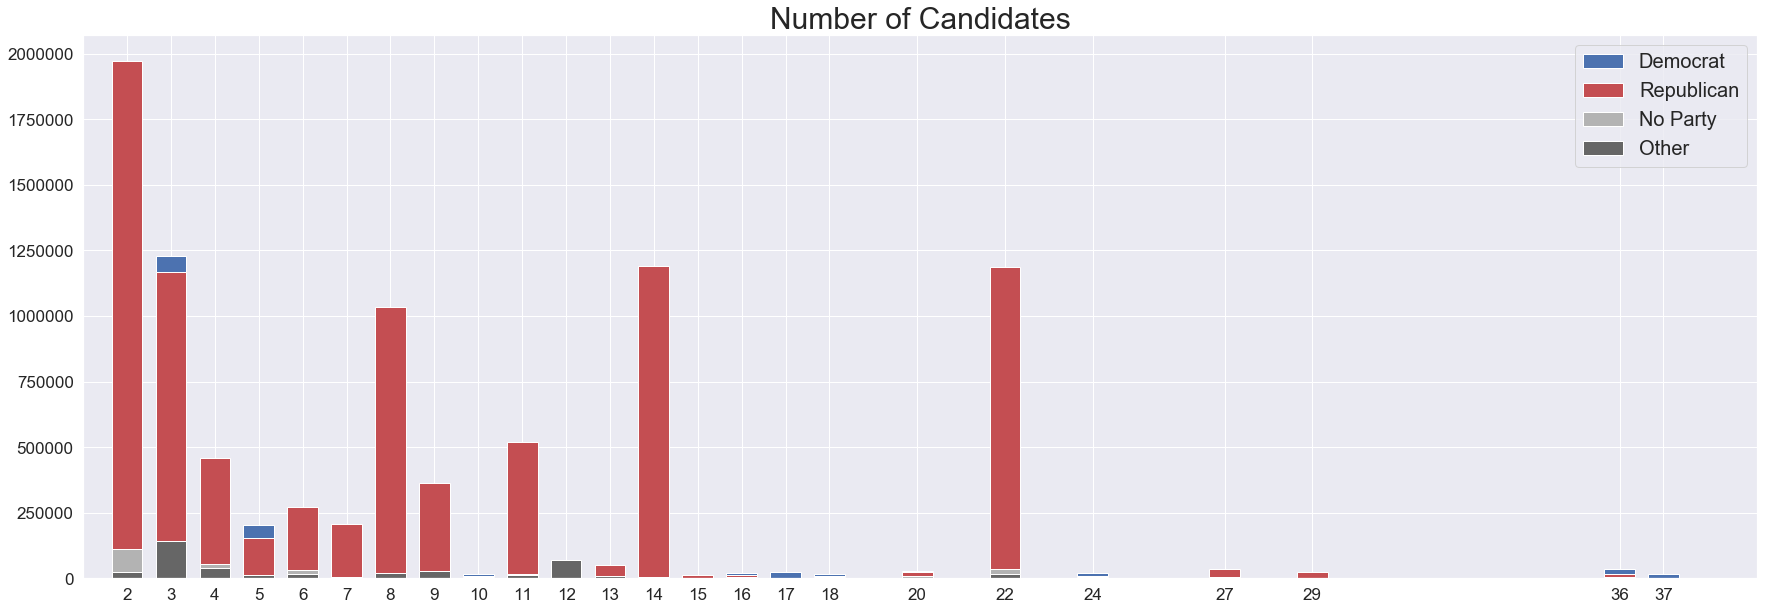

In [0]:
x = results.n_can.unique()
x_other = results[results['party']=='OTHER'].n_can.unique()

width = 0.7

plt.figure(figsize = (30, 10))

dem_v = plt.bar(x, demvotes_n_can, width, color='b')
rep_v = plt.bar(x, repvotes_n_can, width, color='r')
nopty_v = plt.bar(x, noptyvotes_n_can, width, color='0.7')
other_v = plt.bar(x_other, othervotes_n_can, width, color='0.4')

#plt.xlabel('Number of Candidates')
#plt.ylabel('Number of Races')
plt.title('Number of Candidates', fontsize=30)

plt.xlim(xmin=1)
plt.xticks(x, fontsize=17)
plt.yticks(fontsize=17)

plt.legend((dem[0], rep[0], nopty[0], other[0]), ('Democrat', 'Republican', 'No Party', 'Other'),
                          prop={'size':20})

### Races with two candidates

In [0]:
two_can_positions = results[results['n_can']==2]['position'].value_counts()
n_can_positions = results['position'].value_counts()

two_candidates = pd.DataFrame()
two_candidates['position'] = two_can_positions.keys().tolist()
two_candidates['num_two_can'] = two_can_positions.tolist()
two_candidates['total_races'] = [n_can_positions[pos] for pos in two_candidates['position']]
two_candidates['fraction_two_can'] = two_candidates['num_two_can'] / two_candidates['total_races']

#for pos, val in zip(two_can_positions.keys().tolist(), two_can_positions.tolist()):
#    print(pos, val)
#    print(n_can_positions[pos])

#[total / two_can for total, two_can in zip()]

#print(two_can_positions.keys())

print(two_candidates.sort_values('fraction_two_can', ascending=False))

                    position  num_two_can  total_races  fraction_two_can
27                   Coroner            2            2          1.000000
26       Judge, Family Court            2            2          1.000000
25         Associate Justice            2            2          1.000000
23    City Judge, City Court            2            2          1.000000
19              Police Juror            6            6          1.000000
16    Judge, Court of Appeal            8            8          1.000000
13                 Selectman           12           18          0.666667
17                   Marshal            6            9          0.666667
10         District Attorney           22           35          0.628571
20       Councilman at Large            4            7          0.571429
1                   Alderman          116          215          0.539535
4             Council Member           66          123          0.536585
9               Constable(s)           22          